# Applied Project
<b><i>Applied Project - Credit Risk Modeling with Machine Learning Techniques</i></b>
<br>
<b><i>Author: Jeremy Tan</i></b>
<br>
<b><i>CID: 01237350</i></b> 
<br>
<b><i>MSc Finance Programme</i></b>

### Program Abstract
This project seeks to utilise various selected machine learning techniques to 
construct models that endeavour to consistently and accurately predict default
in consumer credit loans. 

The data used is that provided and made open-source by LendingClub on the Kaggle
platform. 

As such, this project in particular will be focused on consumer credit risk 
models. However, more broadly, this project attempts to illustrate the benefits
of using such models to improve the accuracy of assessing credit risk applications. 

This project will also seek to illustrate the use of machine learning
techniques to drive and enhance instead of substituting human intuition.

<b><i>This code has also been posted onto my github for preferred ease of reading at the reader's discretion.</i></b>

## Importing Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 

from sklearn import preprocessing

# visual commands
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Reading Data

Data was obtained from Kaggle.
<br>
Available at: <url>https://www.kaggle.com/wendykan/lending-club-loan-data

In [112]:
df = pd.read_csv('loan.csv')
df.head()
df.describe().round(2)

//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887375.00,887379.00,887350.00,...,21372.00,18617.00,21372.00,21372.00,21372.00,21372.00,817103.00,21372.00,21372.00,21372.00
mean,32465133.06,35001824.82,14755.26,14741.88,14702.46,13.25,436.72,75027.59,18.16,0.31,...,36552.81,71.54,1.39,2.98,5887.98,60.83,32068.62,0.94,1.54,1.98
std,22827341.72,24113354.68,8435.46,8429.90,8442.11,4.38,244.19,64698.30,17.19,0.86,...,43103.83,23.02,1.52,2.63,5284.70,20.01,37498.26,1.45,2.72,2.87
min,54734.00,70473.00,500.00,500.00,0.00,5.32,15.67,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4.00
25%,9206643.00,10877133.50,8000.00,8000.00,8000.00,9.99,260.70,45000.00,11.91,0.00,...,10251.50,58.60,0.00,1.00,2411.00,47.70,13900.00,0.00,0.00,0.00
50%,34433267.00,37095283.00,13000.00,13000.00,13000.00,12.99,382.55,65000.00,17.65,0.00,...,24684.50,74.90,1.00,2.00,4483.00,61.90,23700.00,0.00,0.00,2.00
75%,54908135.00,58471347.00,20000.00,20000.00,20000.00,16.20,572.60,90000.00,23.95,0.00,...,47858.00,87.60,2.00,4.00,7771.50,75.20,39800.00,1.00,2.00,3.00
max,68617057.00,73544841.00,35000.00,35000.00,35000.00,28.99,1445.46,9500000.00,9999.00,39.00,...,878459.00,223.30,22.00,43.00,127305.00,151.40,9999999.00,17.00,35.00,32.00


We can see that that the data is mixed with quantitative and qualitative variables. It also contains variables that have missing values.

## Exploratory Data Analysis

Just to get a sense of the data that we are dealing with, we dive into and visualise certain aspects of the data that we think is important and relevant to the study.

Count of all unique values in the loan_status target variable:


Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

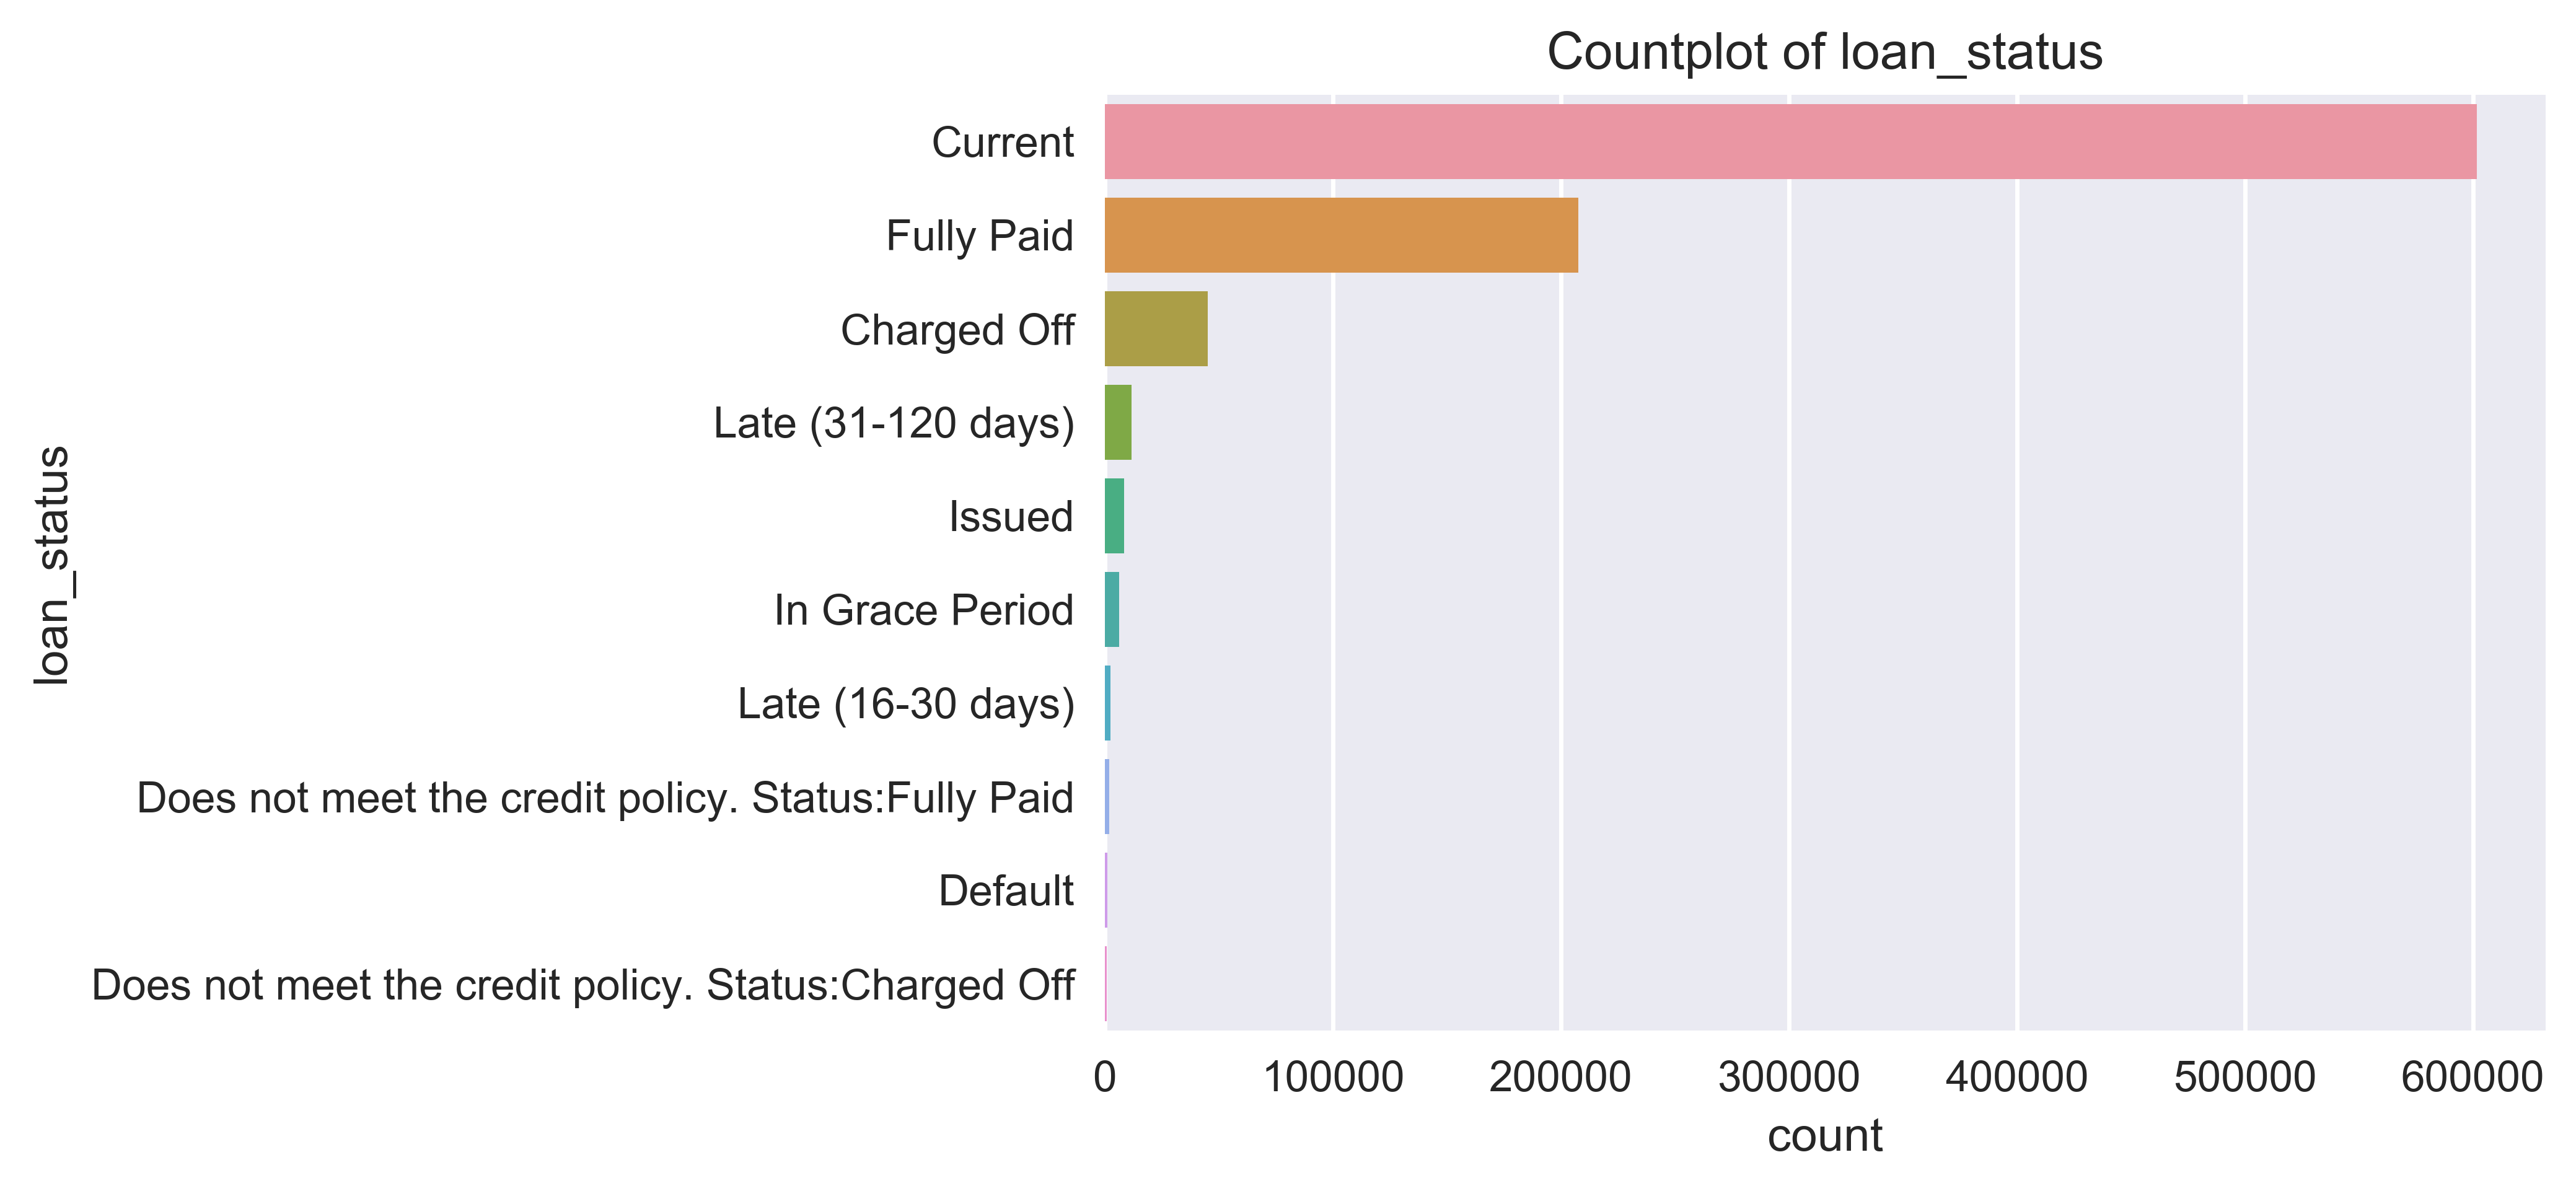

In [111]:
# Getting all unique values of the target variable
print('Count of all unique values in the loan_status target variable:')
df.loan_status.value_counts()

plt.figure(dpi=500)
plt.title('Countplot of loan_status')
sns.countplot(y="loan_status", data=df, order=list(df.loan_status.value_counts().keys()))

Looking at the target variable (<i>loan_status</i>), we can see that a large proportion of the dataset is comprised of
loans that have not yet have any "event" occur. The remaining dataset of loans have either been fully paid off or 
have had some "event" occur to it. Details on the description of each unique tag is provided in the footnote in the report.

For the purposes of this study, we will simplify this classification problem by condensing the multi-classification problem from 10 classes to 5. This will be expanded in detail later below.

In [117]:
# Determing if all ids are unique
# this command outputs an array of all the unique ids in the member_id variable
df["member_id"].unique()

# this command coutns all the unique ids
print("Count of all the unique ids in array:")
np.shape(df["member_id"].unique())

array([ 1296599,  1314167,  1313524, ..., 38982739, 39222577, 38982659])

Count of all the unique ids in array:


(887379,)

We check here also to ensure that all entries are unique, and indeed they are. We have a total of <b>887,379</b> observations. 

In [114]:
# list of data types in the raw dataset
print('List of data types for the respective variables in the dataset:')
df.dtypes

# total count for the varying data types
print('Total count for the varying data types in the dataset:')
df.dtypes.value_counts()

List of data types for the respective variables in the dataset:


id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

Total count for the varying data types in the dataset:


float64    49
object     23
int64       2
dtype: int64

We have a total of <b>74</b> features, including the <b>target variable</b>. They are further split into <b>51</b> numerical and <b>23</b> categorical variables.

### Data Visualisation

In [7]:
from wordcloud import WordCloud

<b>Visualising the frequencies for the various purpose for loans</b>

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

(-0.5, 399.5, 199.5, -0.5)

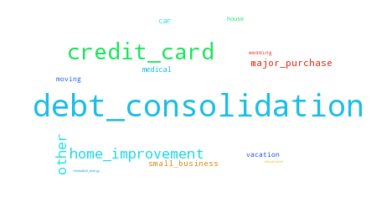

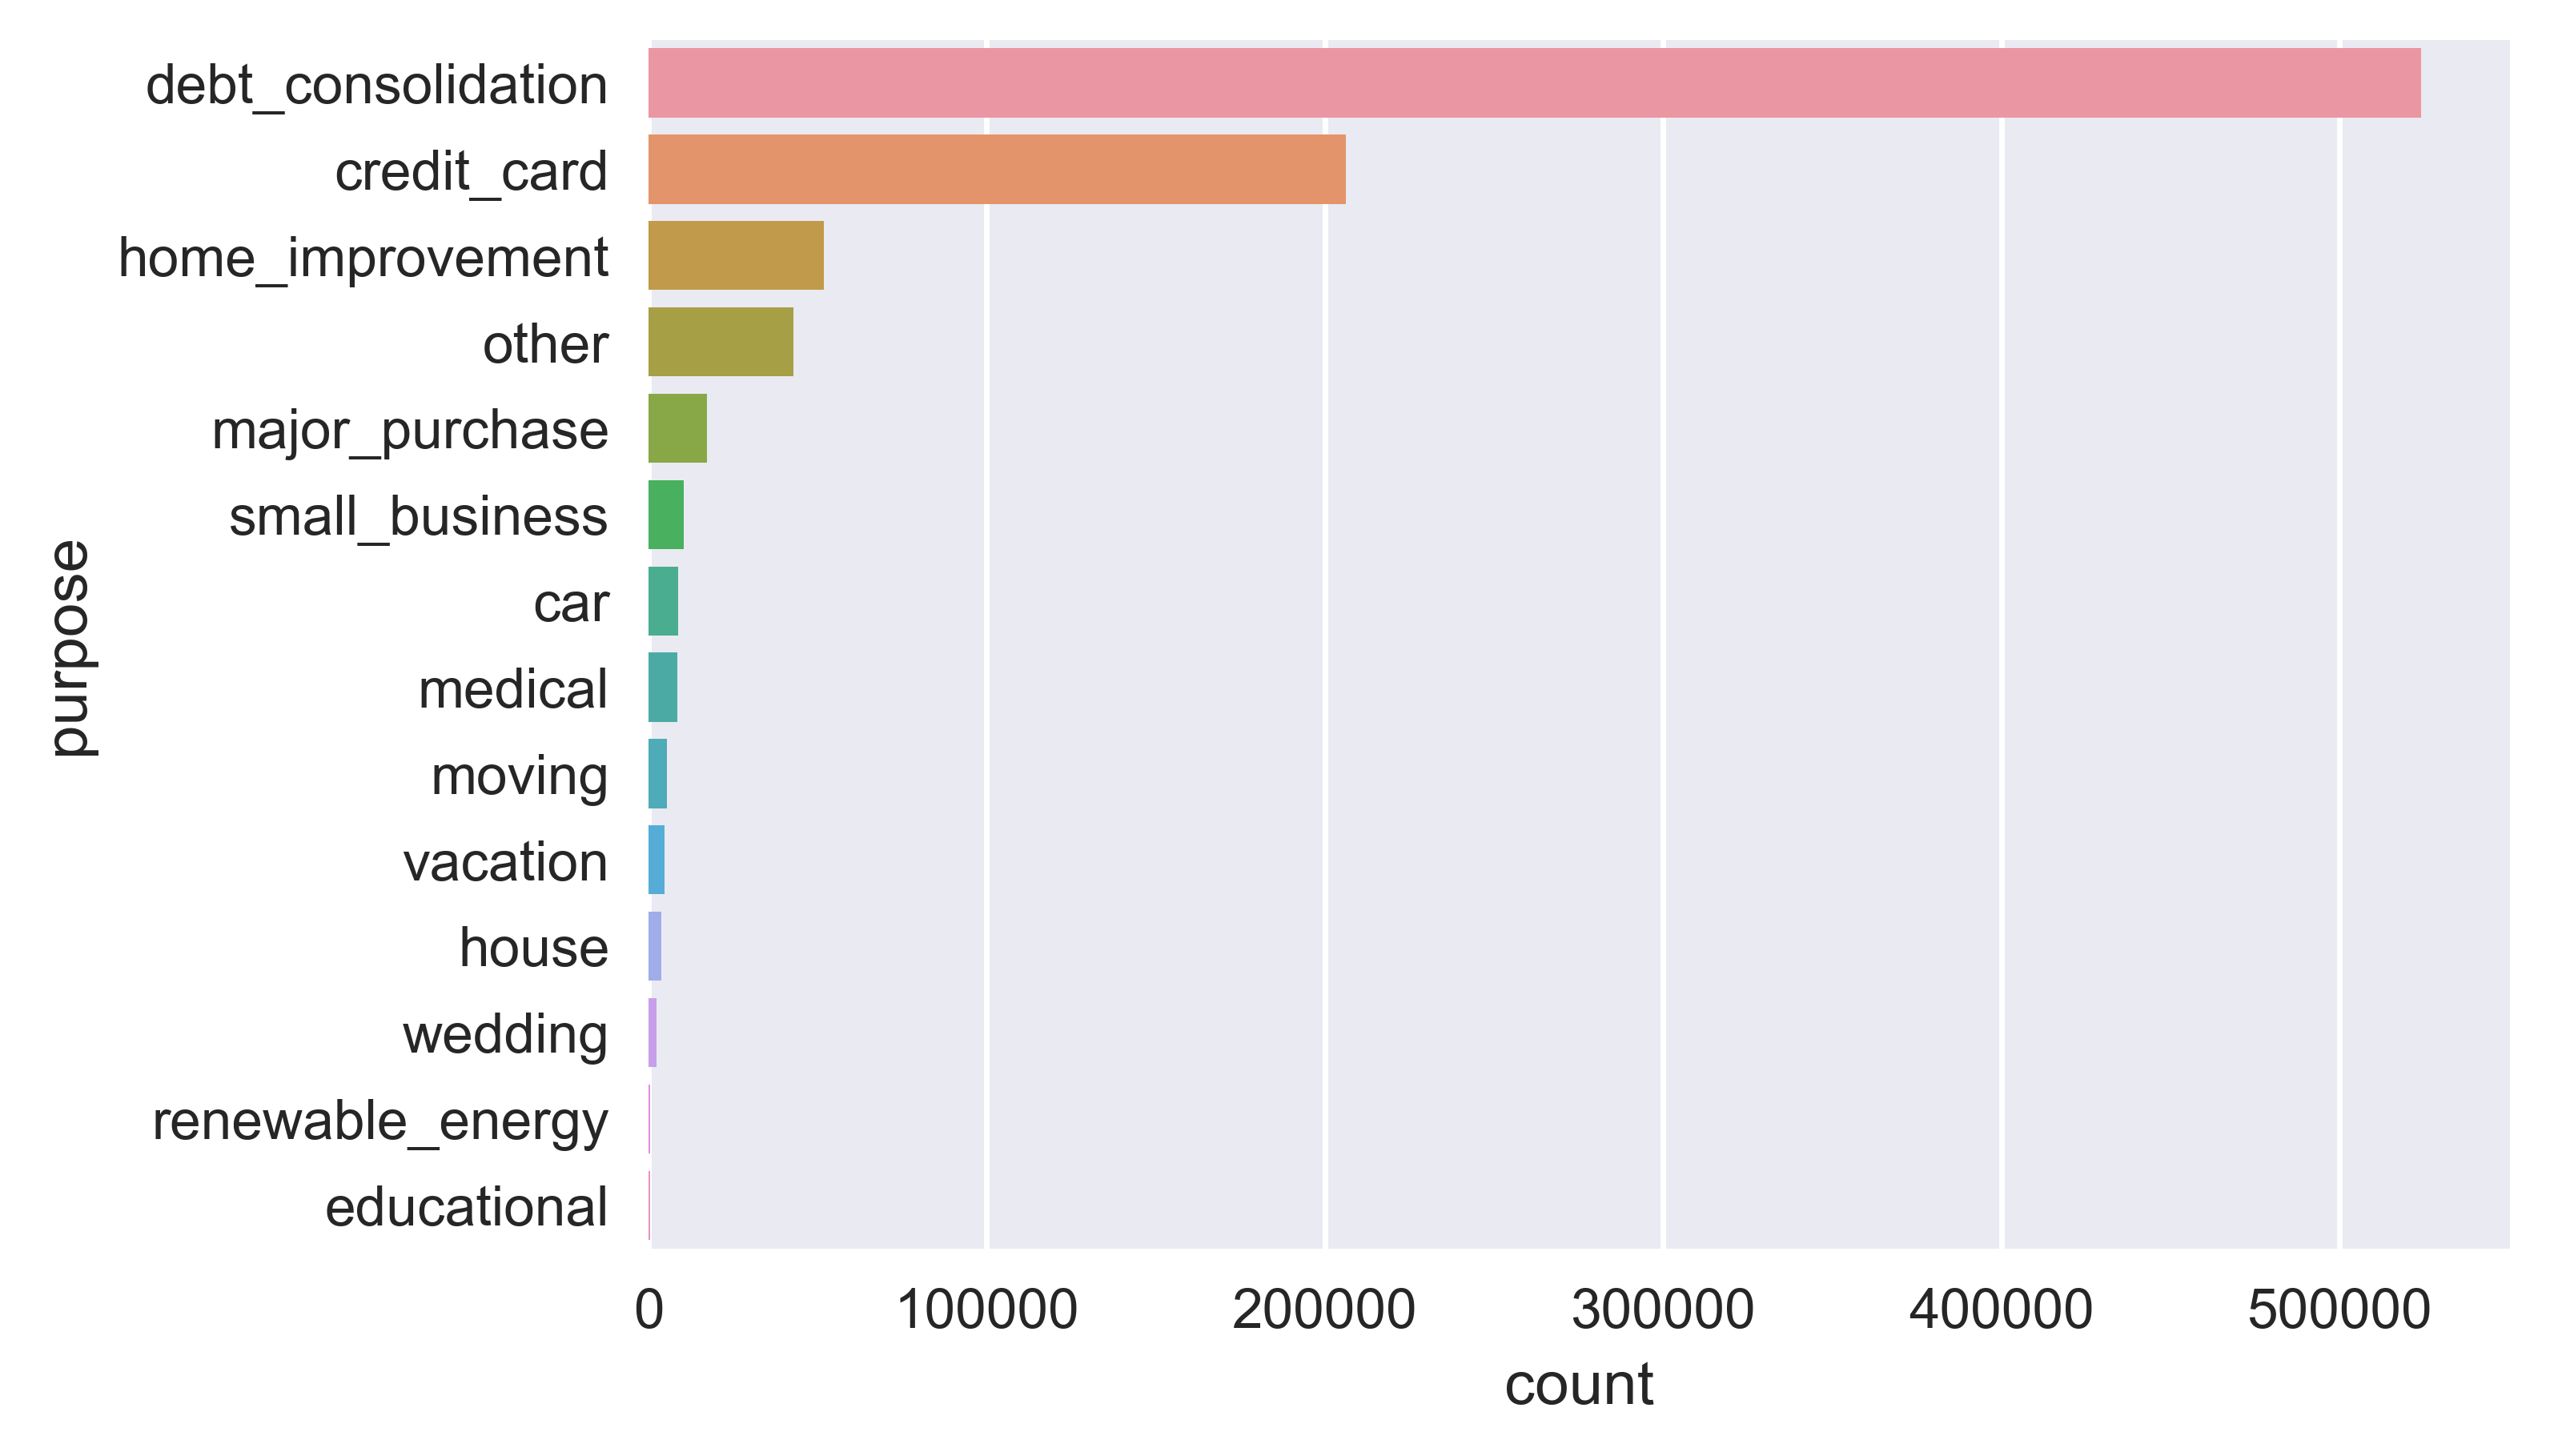

In [8]:
# Generating word cloud for the Purpose of Loan
# Word Cloud: Purpose of Loan
tuples = tuple([tuple(x) for x in df.purpose.value_counts().reset_index().values])
df.purpose.value_counts()
wc_purpose = WordCloud(mode="RGBA", background_color="white", relative_scaling=.45).generate_from_frequencies(tuples)
plt.imshow(wc_purpose, interpolation='bilinear')
plt.axis('off')

plt.figure(dpi=500)
sns.countplot(y="purpose", data=df, order=list(df.purpose.value_counts().keys()))

<b>Visualising the frequencies for the various types of Home Ownership</b>

Count for the unique values of Home Ownership:


MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

(-0.5, 399.5, 199.5, -0.5)

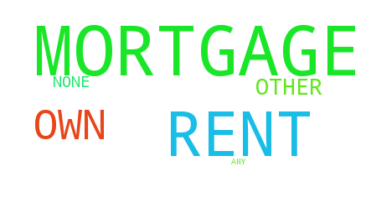

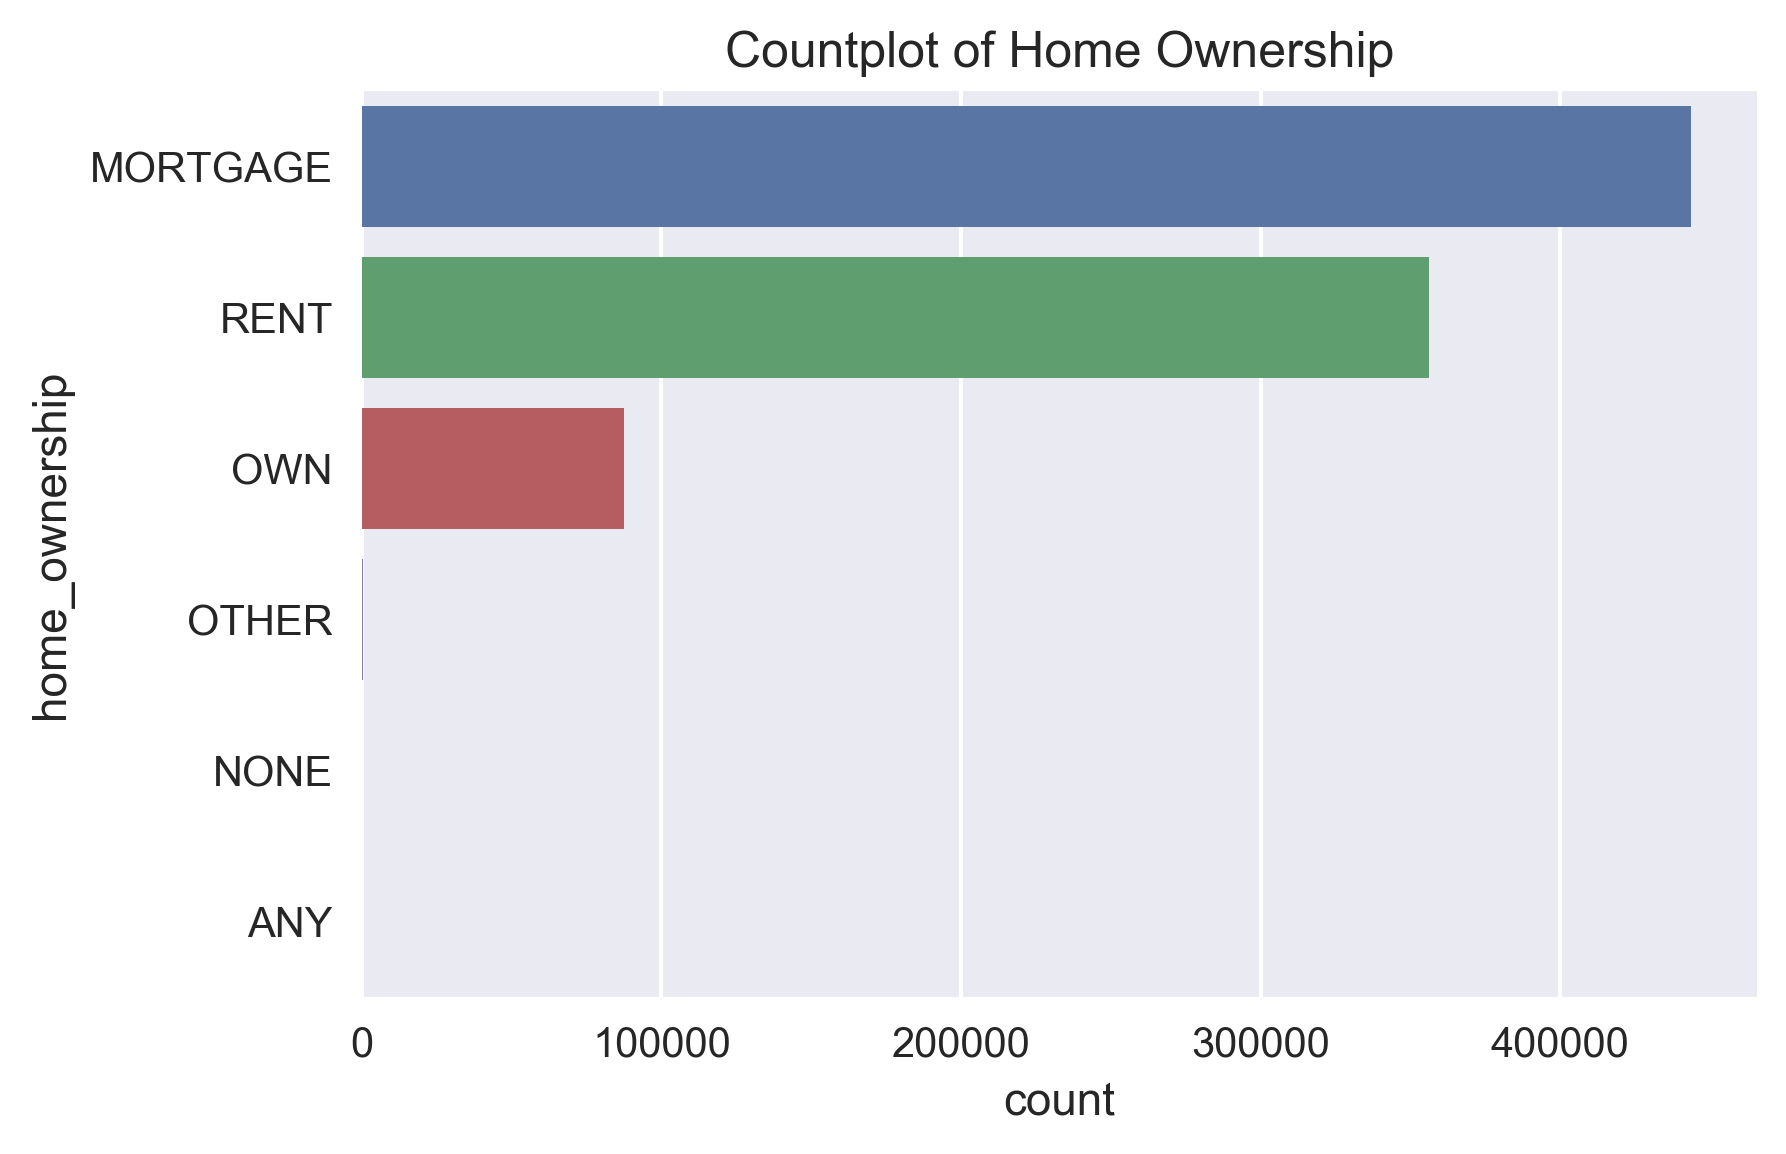

In [119]:
# Generating a Word Cloud: Home Ownership
print('Count for the unique values of Home Ownership:')
tuples = tuple([tuple(x) for x in df.home_ownership.value_counts().reset_index().values])
df.home_ownership.value_counts()
wc_homeown = WordCloud(mode="RGBA", background_color="white", relative_scaling=.45).generate_from_frequencies(tuples)
plt.imshow(wc_homeown, interpolation='bilinear')
plt.axis("off")

plt.figure(dpi=300)
plt.title('Countplot of Home Ownership')
sns.countplot(y="home_ownership", data=df, order=list(df.home_ownership.value_counts().keys()))

We can see that the most of the borrowers either are <b>financing a mortgage</b>, <b>renting</b>, or <b>own</b> their houses.

<b>LVplot of Loan Amount against Purpose of Loan</b>

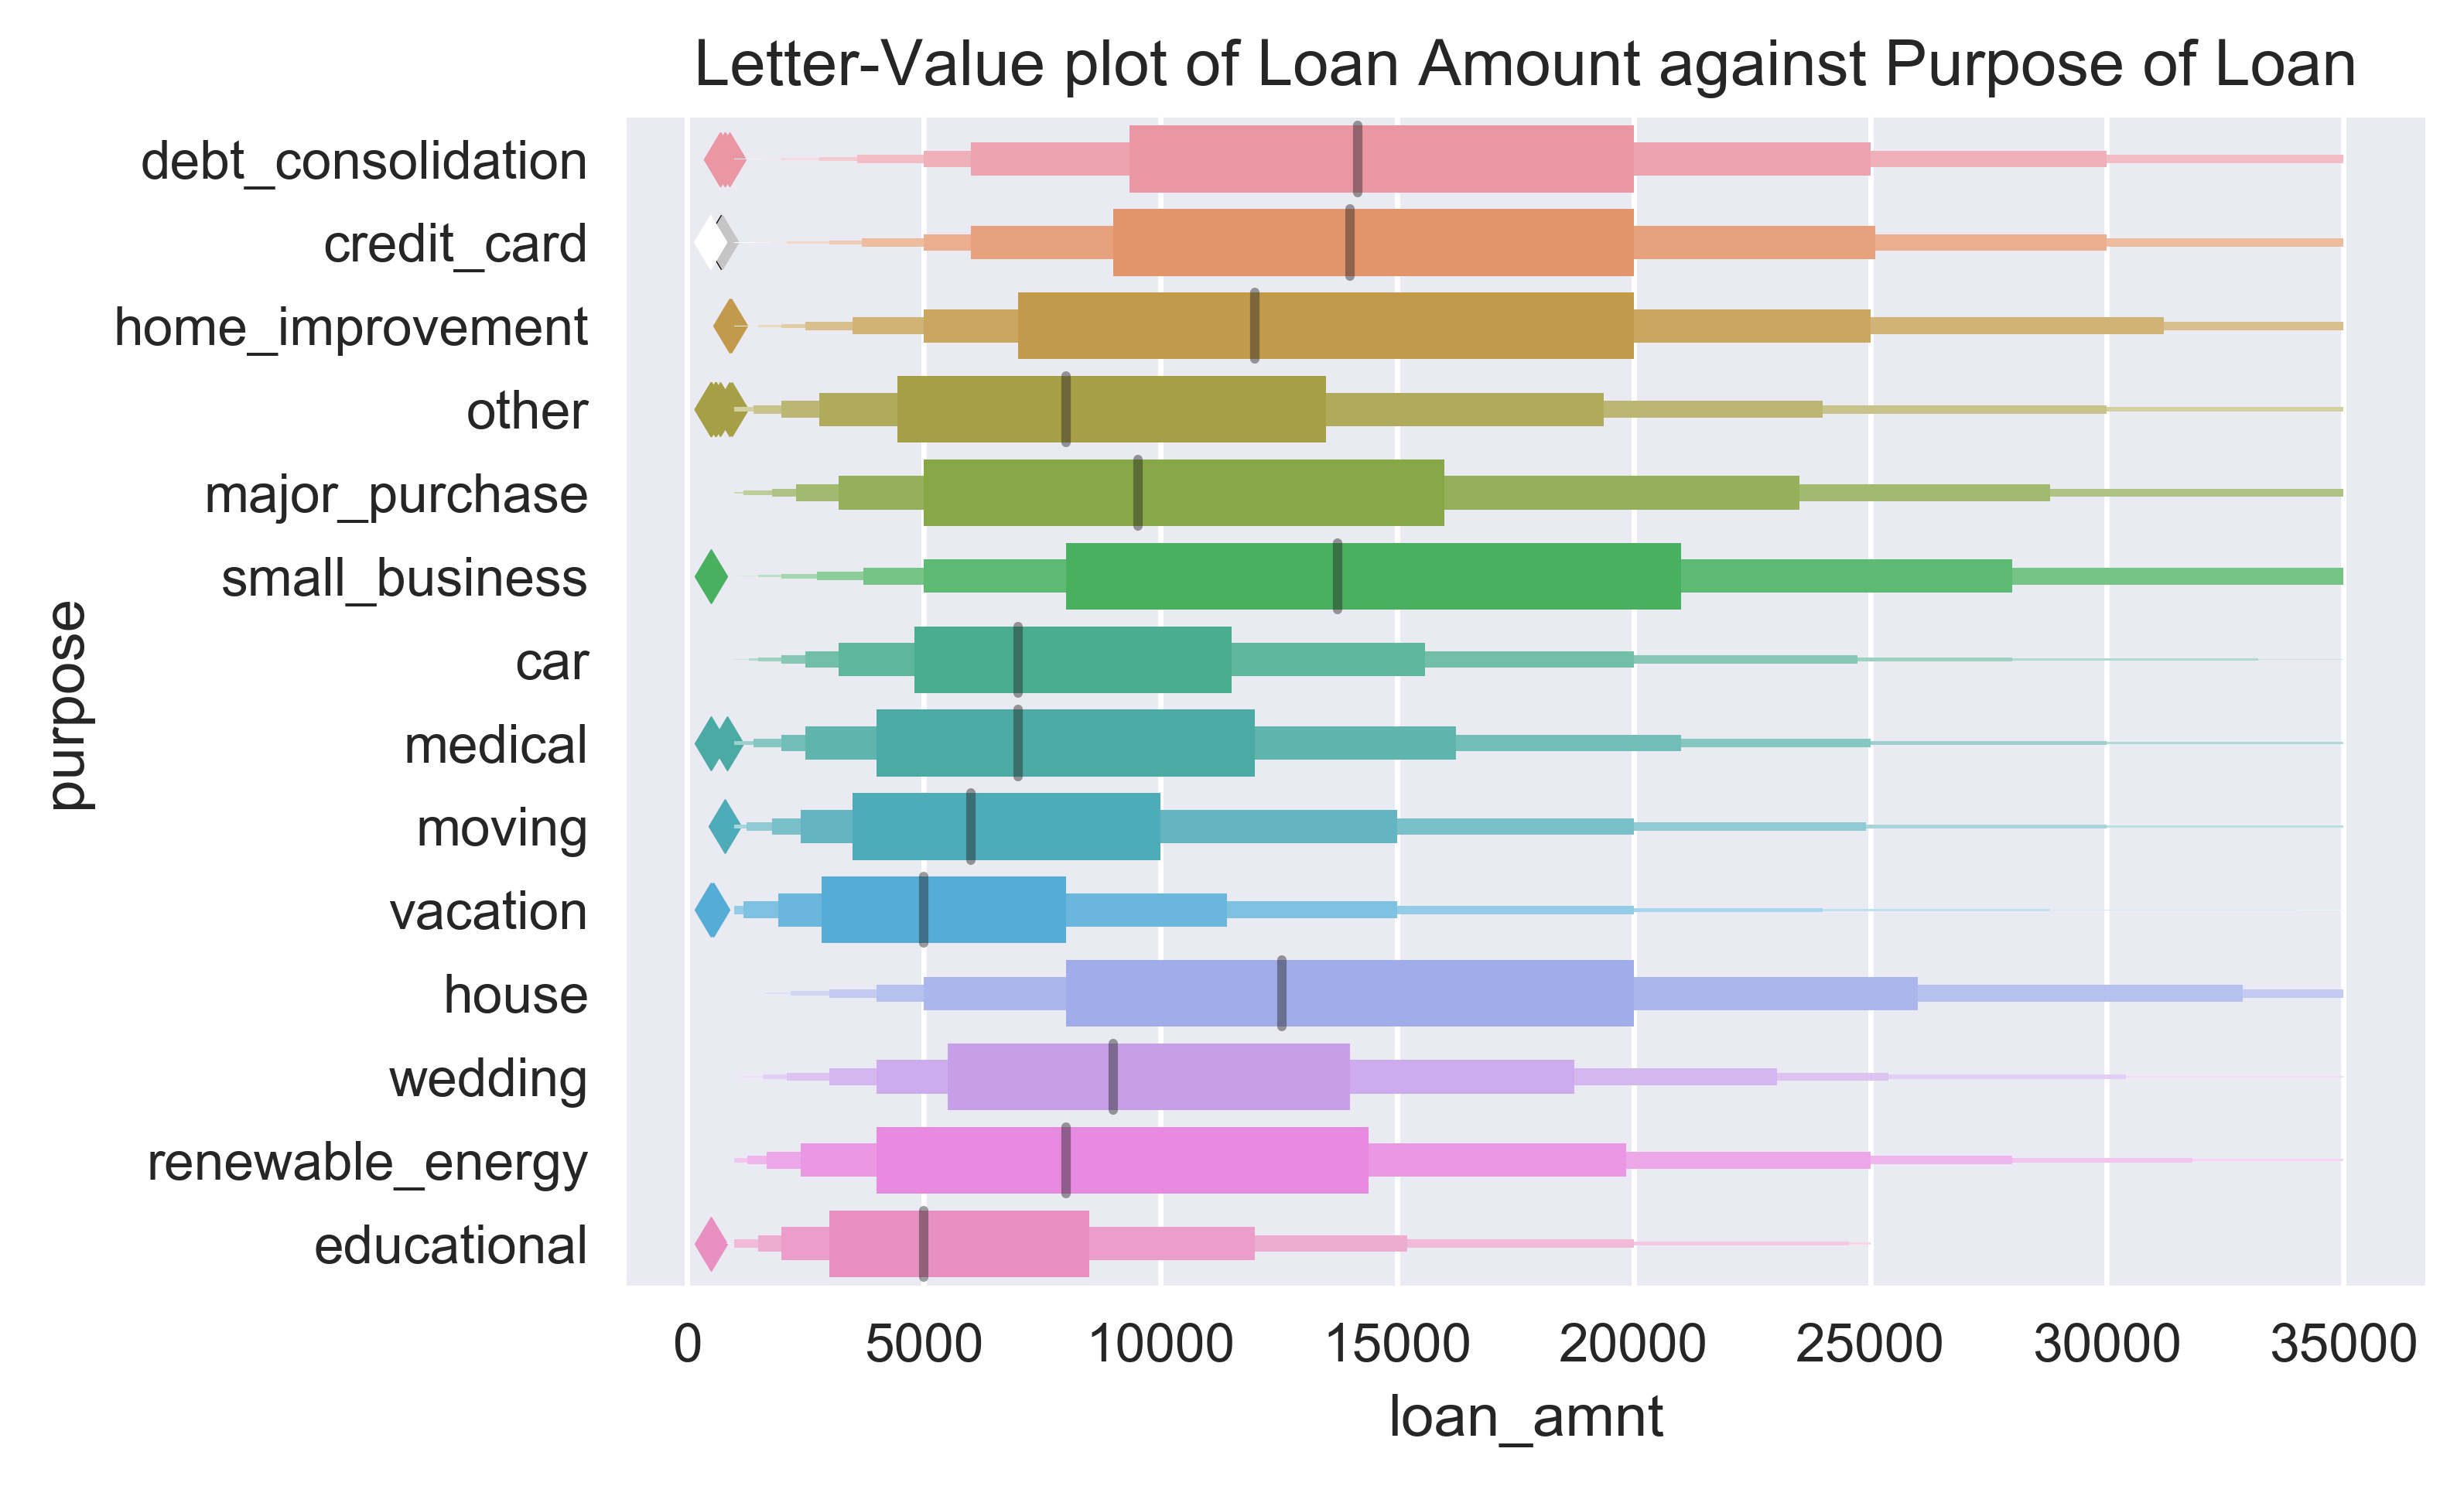

In [10]:
plt.figure(dpi=500)
plt.title("Letter-Value plot of Loan Amount against Purpose of Loan")
sns.lvplot(x="loan_amnt", y="purpose", data=df, order=list(df.purpose.value_counts().keys()))

<b>Boxplot of Interest Rate against Purpose of Loan</b>

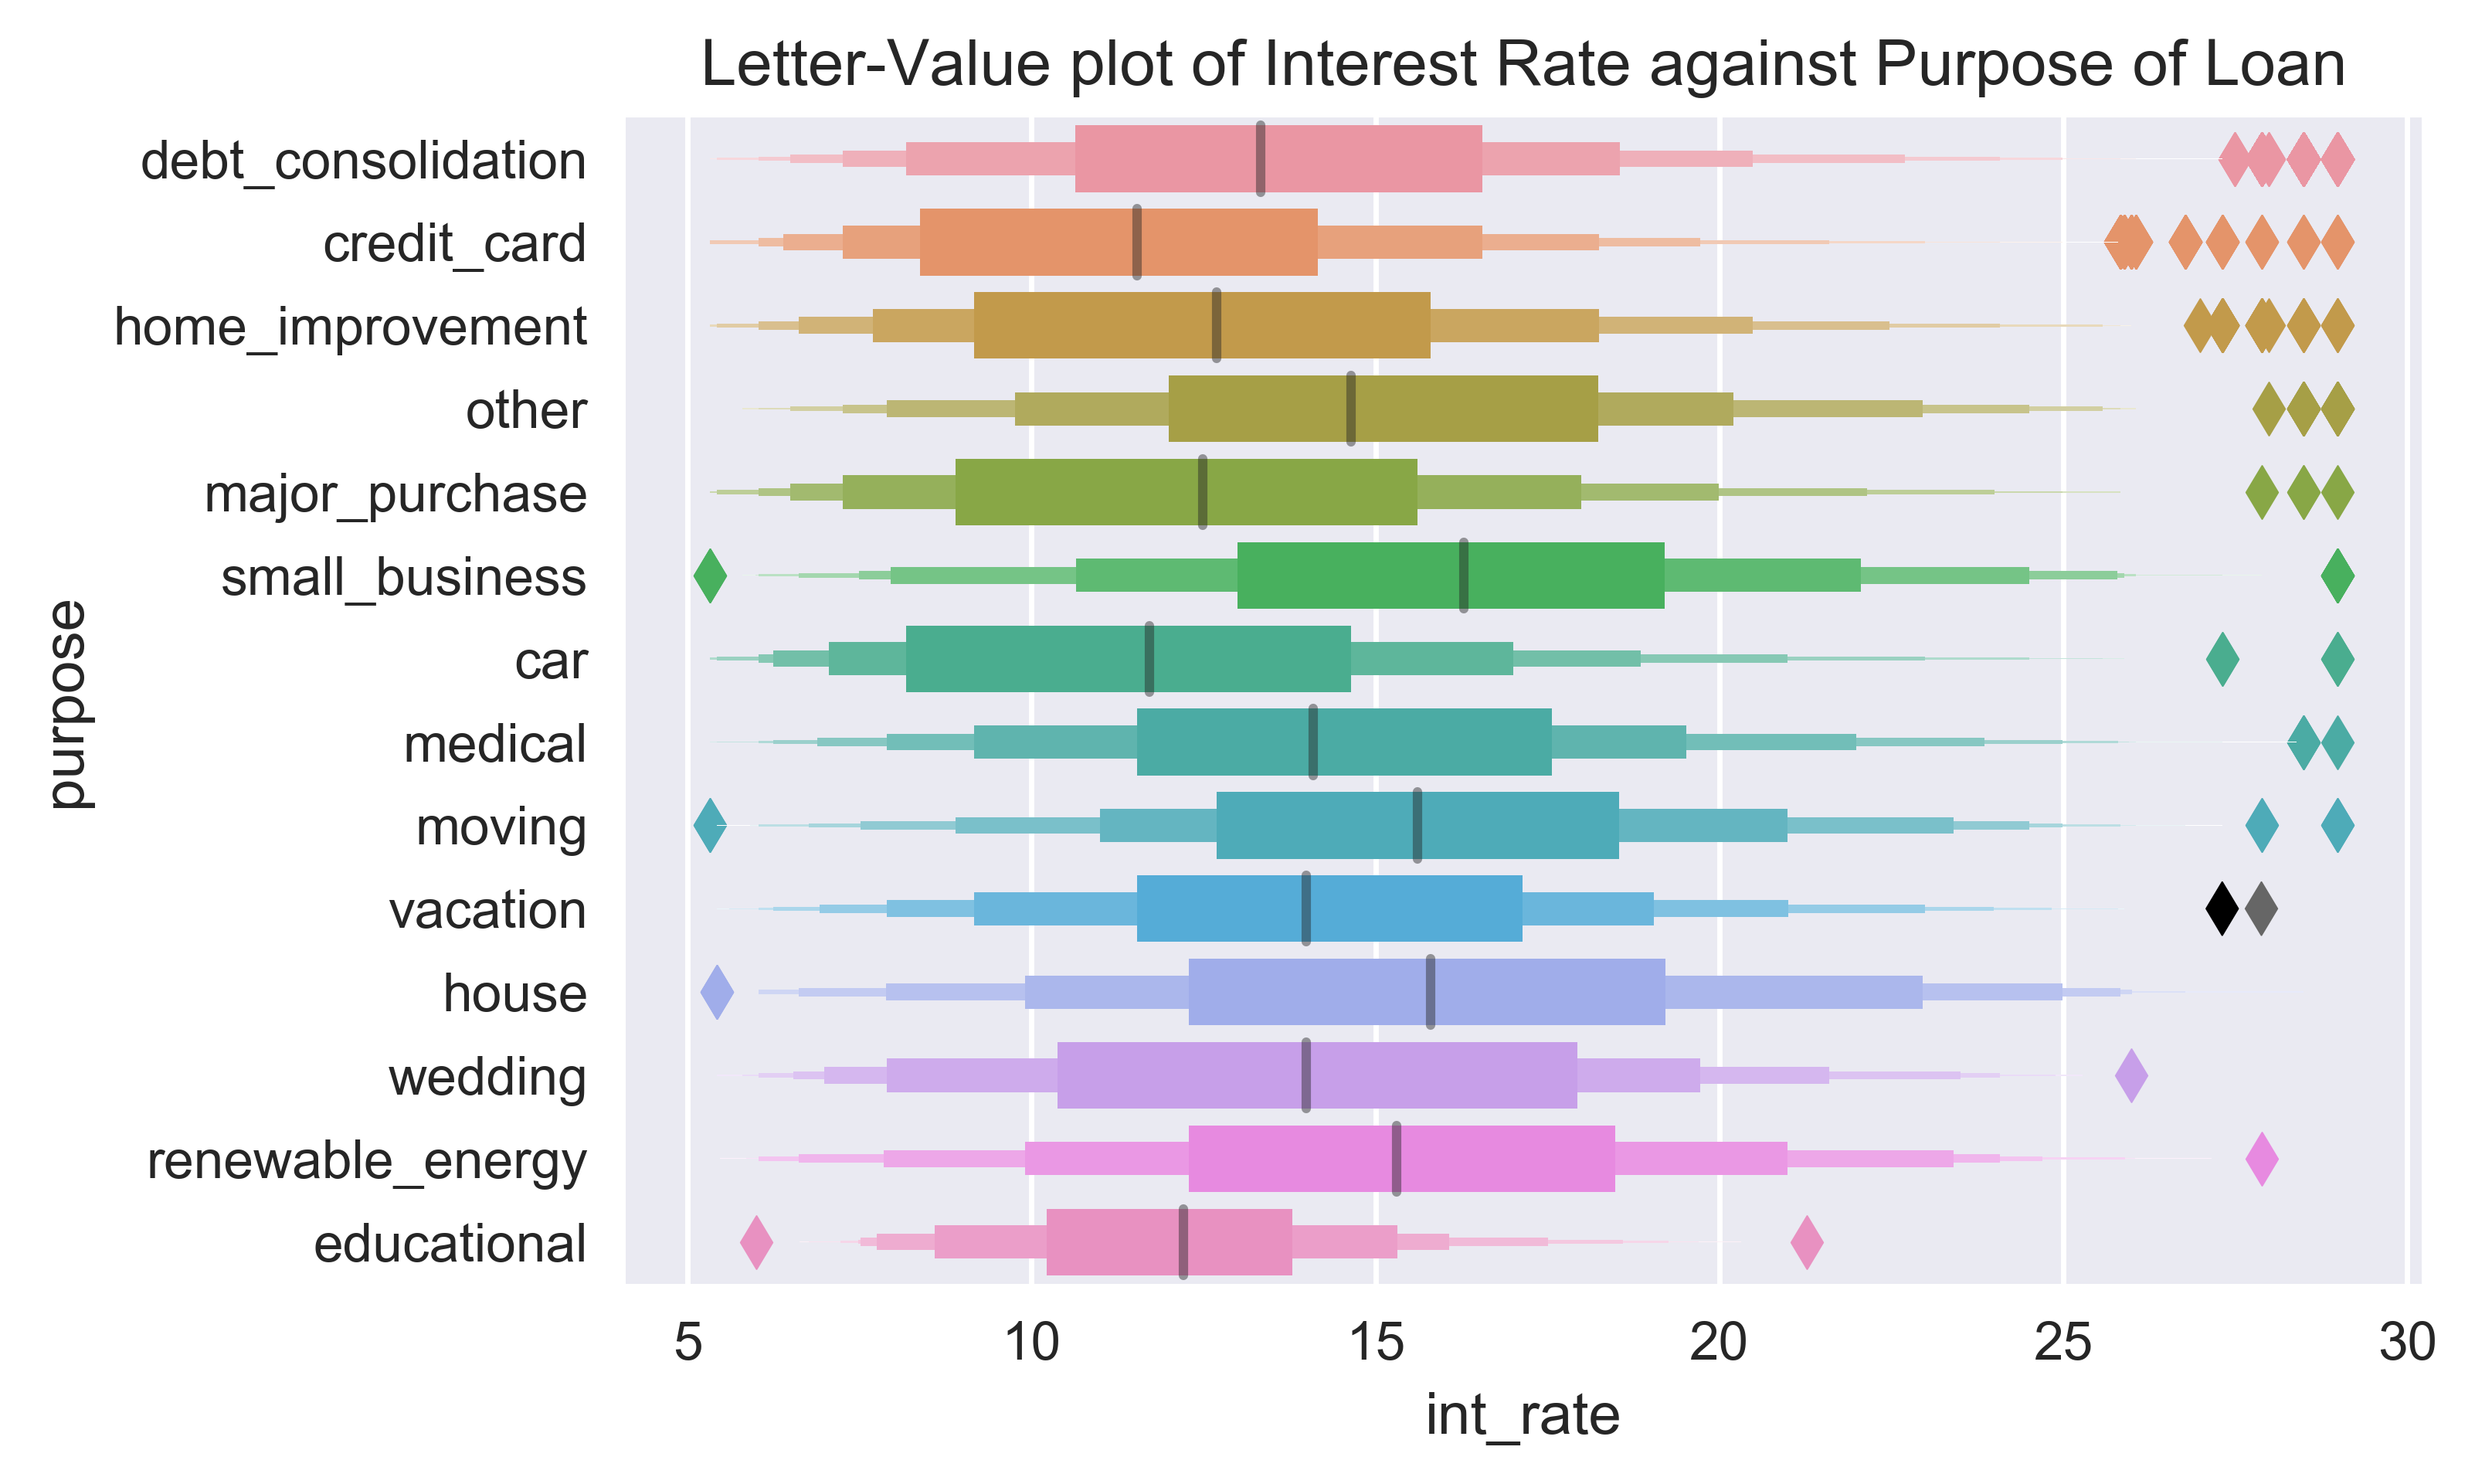

In [11]:
plt.figure(dpi=500)
plt.title("Letter-Value plot of Interest Rate against Purpose of Loan")
sns.lvplot(x="int_rate", y="purpose", data=df, order=list(df.purpose.value_counts().keys()))

<b>Distribution Plot for the interest rates charged to borrowers</b>

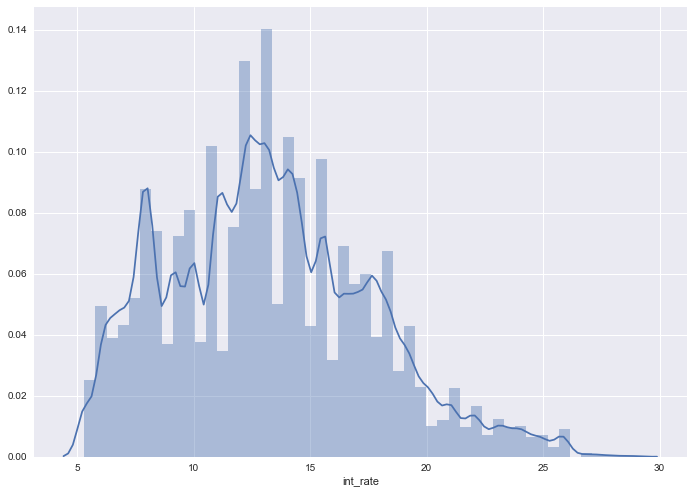

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(df.int_rate, ax=ax)
sns.despine()

## Dealing with Missing Data

From looking at the overall description of the entire dataset, we know that there are columns that have missing data
we now identify the variables that contain missing data, and the % of data that is missing as a rule, we will <b><i>drop the variables that have a >50% of missing data</i></b> as imputing values for such variables would highly likely result in large statistical inaccuracy.

We split the data into its respective data type: <b>Numerical</b> and <b>Categorical</b> and proceed on to drop the variables that satisfy the dropping condition.

In [120]:
# Numerical Data
num_cols = df.select_dtypes(exclude=["object"])

# Numeric Data: Missing Values (%)
print('Sorted list of Numerical Variables with missing values:')
((num_cols.isnull().sum()/887379)*100).sort_values(axis="index", ascending=False)

Sorted list of Numerical Variables with missing values:


dti_joint                      99.942640
annual_inc_joint               99.942415
il_util                        97.902024
mths_since_rcnt_il             97.654892
total_cu_tl                    97.591559
open_acc_6m                    97.591559
open_il_6m                     97.591559
open_il_12m                    97.591559
open_il_24m                    97.591559
inq_last_12m                   97.591559
total_bal_il                   97.591559
open_rv_12m                    97.591559
open_rv_24m                    97.591559
max_bal_bc                     97.591559
all_util                       97.591559
inq_fi                         97.591559
mths_since_last_record         84.555303
mths_since_last_major_derog    75.015974
mths_since_last_delinq         51.197065
total_rev_hi_lim                7.919502
tot_coll_amt                    7.919502
tot_cur_bal                     7.919502
revol_util                      0.056571
collections_12_mths_ex_med      0.016340
pub_rec         

Large proportion of the numerical values have at least 1 missing value.

In [122]:
# Dropping significant missing data columns 
numdrop = ["mths_since_last_delinq", "mths_since_last_record", "mths_since_last_major_derog",
        "annual_inc_joint", "dti_joint", "open_acc_6m", "open_il_6m",
        "open_il_12m", "open_il_24m", "mths_since_rcnt_il", "total_bal_il",
        "il_util", "open_rv_12m", "open_rv_24m", "max_bal_bc", "all_util",
        "inq_fi", "total_cu_tl", "inq_last_12m", "policy_code", "id", "member_id"]  
num_cols = num_cols.drop(num_cols[numdrop], axis=1)

# concatenating target variable with numerical variables dataframe
num_cols = pd.concat([df.loan_status, num_cols], axis=1)

Drop 19 columns that have <b>missing values of > 50%</b>. Also drop <b><i>id</i></b> and <b><i>member_id</i></b> since they are of no predictive significance

In [123]:
# displaying intermediate numerical dataframe
num_cols

,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,Fully Paid,5000.0,5000.0,4975.000000,10.65,162.87,24000.00,27.65,0.0,1.0,...,861.07,0.00,0.00,0.0000,171.62,0.0,0.0,NaN,NaN,NaN
1,Charged Off,2500.0,2500.0,2500.000000,15.27,59.83,30000.00,1.00,0.0,5.0,...,435.17,0.00,117.08,1.1100,119.66,0.0,0.0,NaN,NaN,NaN
2,Fully Paid,2400.0,2400.0,2400.000000,15.96,84.33,12252.00,8.72,0.0,2.0,...,603.65,0.00,0.00,0.0000,649.91,0.0,0.0,NaN,NaN,NaN
3,Fully Paid,10000.0,10000.0,10000.000000,13.49,339.31,49200.00,20.00,0.0,1.0,...,2209.33,16.97,0.00,0.0000,357.48,0.0,0.0,NaN,NaN,NaN
4,Current,3000.0,3000.0,3000.000000,12.69,67.79,80000.00,17.94,0.0,0.0,...,1009.07,0.00,0.00,0.0000,67.79,0.0,0.0,NaN,NaN,NaN
5,Fully Paid,5000.0,5000.0,5000.000000,7.90,156.46,36000.00,11.20,0.0,3.0,...,631.38,0.00,0.00,0.0000,161.03,0.0,0.0,NaN,NaN,NaN
6,Current,7000.0,7000.0,7000.000000,15.96,170.08,47004.00,23.51,0.0,1.0,...,3025.99,0.00,0.00,0.0000,170.08,0.0,0.0,NaN,NaN,NaN
7,Fully Paid,3000.0,3000.0,3000.000000,18.64,109.43,48000.00,5.35,0.0,2.0,...,938.14,0.00,0.00,0.0000,111.34,0.0,0.0,NaN,NaN,NaN
8,Charged Off,5600.0,5600.0,5600.000000,21.28,152.39,40000.00,5.55,0.0,2.0,...,294.94,0.00,189.06,2.0900,152.39,0.0,0.0,NaN,NaN,NaN
9,Charged Off,5375.0,5375.0,5350.000000,12.69,121.45,15000.00,18.08,0.0,0.0,...,533.42,0.00,269.29,2.5200,121.45,0.0,0.0,NaN,NaN,NaN


<b>Performing median imputation on remaining numerical variables.</b> <br>
The ideal imputation method would be KNN Imputation, however, because of the time and computational constraint, will use Median Imputation  of each target variable class.

In [124]:
# numerical variables that need to be imputed
numimp = ["annual_inc", "delinq_2yrs", "inq_last_6mths", "open_acc", 
            "pub_rec", "revol_util", "total_acc", "collections_12_mths_ex_med",
            "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]

# filling in missing values with respective target category median value
for i in numimp:
    num_cols[i] = df.groupby("loan_status").transform(lambda x: x.fillna(x.median()))

In [125]:
# now we see that the count for all variables is 887379, thus all missing values for all numerical variables have been
# imputed 
num_cols.describe().round(2)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,...,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00,887379.00
mean,14755.26,14741.88,14702.46,13.25,436.72,32465133.06,18.16,32465133.06,32465133.06,32465133.06,...,1754.80,0.40,45.92,4.88,2164.15,32465133.06,32465133.06,32465133.06,32465133.06,32465133.06
std,8435.46,8429.90,8442.11,4.38,244.19,22827341.72,17.19,22827341.72,22827341.72,22827341.72,...,2095.36,4.09,409.69,63.13,4794.78,22827341.72,22827341.72,22827341.72,22827341.72,22827341.72
min,500.00,500.00,0.00,5.32,15.67,54734.00,0.00,54734.00,54734.00,54734.00,...,0.00,0.00,0.00,0.00,0.00,54734.00,54734.00,54734.00,54734.00,54734.00
25%,8000.00,8000.00,8000.00,9.99,260.70,9206643.00,11.91,9206643.00,9206643.00,9206643.00,...,441.46,0.00,0.00,0.00,280.17,9206643.00,9206643.00,9206643.00,9206643.00,9206643.00
50%,13000.00,13000.00,13000.00,12.99,382.55,34433267.00,17.65,34433267.00,34433267.00,34433267.00,...,1073.28,0.00,0.00,0.00,462.78,34433267.00,34433267.00,34433267.00,34433267.00,34433267.00
75%,20000.00,20000.00,20000.00,16.20,572.60,54908135.00,23.95,54908135.00,54908135.00,54908135.00,...,2238.27,0.00,0.00,0.00,831.24,54908135.00,54908135.00,54908135.00,54908135.00,54908135.00
max,35000.00,35000.00,35000.00,28.99,1445.46,68617057.00,9999.00,68617057.00,68617057.00,68617057.00,...,24205.62,358.68,33520.27,7002.19,36475.59,68617057.00,68617057.00,68617057.00,68617057.00,68617057.00


By looking at the <b>count</b> for all numerical variables, that are now 887,379. We can confirm that the missing values have been imputed. 

In [126]:
# Categorical Data
cat_cols = df.select_dtypes(include=["object"])

# Categorical Data: Missing Values (%)
print('Sorted list of Categorical Variables with missing values:')
((cat_cols.isnull().sum()/887379)*100).sort_values(axis="index", ascending=False)

Sorted list of Categorical Variables with missing values:


verification_status_joint    99.942415
desc                         85.797613
next_pymnt_d                 28.507661
emp_title                     5.798762
last_pymnt_d                  1.990018
title                         0.017016
last_credit_pull_d            0.005973
earliest_cr_line              0.003268
issue_d                       0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    0.000000
home_ownership                0.000000
verification_status           0.000000
url                           0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
application_type              0.000000
purpose                       0.000000
zip_code                      0.000000
addr_state                    0.000000
initial_list_status           0.000000
term                          0.000000
dtype: float64

In [19]:
# dropping the variables that do not satisfy the missing data condition
cat_cols = cat_cols.drop(cat_cols[["desc","verification_status_joint"]], axis=1)

# Number of unique categories for respective categorical variables
print("Number of unique categories for respective categorical variables")
for i in list(cat_cols):
    print(len(cat_cols[i].unique()))
    
# further dropping other categorical variables for economical reasons
catdrop = ['sub_grade', 'emp_title', 'issue_d', 'url', 'title', 'zip_code',
           'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d',
           'last_credit_pull_d', 'pymnt_plan']
cat_cols = cat_cols.drop(cat_cols[catdrop], axis=1)

Number of unique categories for respective categorical variables
2
7
35
299273
12
6
3
103
10
2
887379
14
63146
935
51
698
2
99
101
104
2


In [20]:
# displaying intermediate categorical dataframe
cat_cols

,term,grade,emp_length,home_ownership,verification_status,loan_status,purpose,initial_list_status,application_type
0,36 months,B,10+ years,RENT,Verified,Fully Paid,credit_card,f,INDIVIDUAL
1,60 months,C,< 1 year,RENT,Source Verified,Charged Off,car,f,INDIVIDUAL
2,36 months,C,10+ years,RENT,Not Verified,Fully Paid,small_business,f,INDIVIDUAL
3,36 months,C,10+ years,RENT,Source Verified,Fully Paid,other,f,INDIVIDUAL
4,60 months,B,1 year,RENT,Source Verified,Current,other,f,INDIVIDUAL
5,36 months,A,3 years,RENT,Source Verified,Fully Paid,wedding,f,INDIVIDUAL
6,60 months,C,8 years,RENT,Not Verified,Current,debt_consolidation,f,INDIVIDUAL
7,36 months,E,9 years,RENT,Source Verified,Fully Paid,car,f,INDIVIDUAL
8,60 months,F,4 years,OWN,Source Verified,Charged Off,small_business,f,INDIVIDUAL
9,60 months,B,< 1 year,RENT,Verified,Charged Off,other,f,INDIVIDUAL


## Encoding Categorical Variables
The encoding step is necessary because sci-kit learn's tree classifier requires all its input to be in numerical format

Applied numeric conversion for the following variables:
- term, emp_length, initial_list_status

Applied One-Hot Label Encoding for the following variables:
- grade, home_ownership, verification_status, purpose, application_type 

In [21]:
# Numeric Conversion
term_mapping = {
                ' 36 months': 36,
                ' 60 months': 60
                }

cat_cols.term = cat_cols.term.map(term_mapping)

emp_length_mapping = { 
                      'n/a': 0,      
                      '< 1 year': 0,
                      '1 year': 1,
                      '2 years': 2,
                      '3 years': 3,
                      '4 years': 4,
                      '5 years': 5,
                      '6 years': 6,
                      '7 years': 7,
                      '8 years': 8,
                      '9 years': 9,
                      '10+ years': 10
                      }

cat_cols.emp_length = cat_cols.emp_length.map(emp_length_mapping)

initial_list_status_mapping = {
                               'f': 1,
                               'w': 0
                               }

cat_cols.initial_list_status = cat_cols.initial_list_status.map(initial_list_status_mapping)

In [22]:
# One-Hot Label Encoding
onehot = ['grade', 'home_ownership', 'verification_status', 'purpose', 'application_type']

for i in onehot:
    dum = pd.get_dummies(cat_cols[i], prefix=i)
    cat_cols = cat_cols.drop(i, axis=1)
    cat_cols = pd.concat([cat_cols, dum], axis=1)

In [23]:
# displaying categorical dataframe
cat_cols

,term,emp_length,loan_status,initial_list_status,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT
0,36,10,Fully Paid,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,60,0,Charged Off,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,36,10,Fully Paid,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,36,10,Fully Paid,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,60,1,Current,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,36,3,Fully Paid,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,60,8,Current,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,36,9,Fully Paid,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,60,4,Charged Off,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
9,60,0,Charged Off,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Framing the Classification Problem
<b>Loan statuses that were condensed:</b><br>
- 'Charged Off': 'Default'<br>
- 'Does not meet the credit policy. Status:Charged Off': 'Default'<br>
- 'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid'<br>
- 'Issued': 'Current'<br>

<b>Loan statuses that correspond to bad events:</b><br>
-'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)', 'Default'<br>

<b>Loan statuses that correspond to good events:</b><br>
- 'Fully Paid'<br>

<b>On-going Loan statuses</b><br>
- 'Current'<br>

We will drop all "Current" loan status and use that data set instead to predict which ones will default and which won't. 

In [26]:
# Condensing Multi-Classification Problem
loan_status_mapping = {
                        'Fully Paid': 'Fully Paid',
                        'Charged Off': 'Default',
                        'Default': 'Default',
                        'Late (31-120 days)': 'Late (31-120 days)',
                        'In Grace Period': 'In Grace Period',
                        'Late (16-30 days)': 'Late (16-30 days)',
                        'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid',
                        'Does not meet the credit policy. Status:Charged Off': 'Default',
                        'Current': 'Current',
                        'Issued': 'Current'
                        }

# mapping both loan status vectors in numerical and categorical dataframe to maintain class mapping to feature space
num_cols.loan_status = num_cols.loan_status.map(loan_status_mapping)
cat_cols.loan_status = cat_cols.loan_status.map(loan_status_mapping)

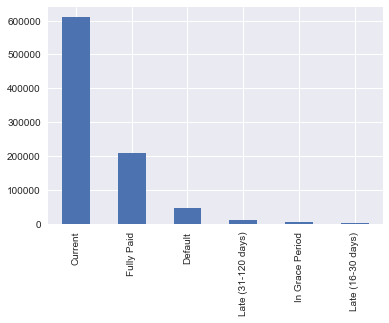

In [27]:
# Count plot for respective mapped loan status values
num_cols.loan_status.value_counts().plot.bar()

In [28]:
# saving "Current" loan statuses to a dataframe for later testing
cur_cat = cat_cols[cat_cols.loan_status == 'Current']
cur_num = num_cols[num_cols.loan_status == 'Current']

In [29]:
# dropping 'loan_status' column from dataframe since it is not needed anymore
cur_num = cur_num.drop('loan_status', axis=1)
cur_cat = cur_cat.drop('loan_status', axis=1)

# concatenating both numerical and categorical variables for current loan statuses
cur_df = pd.concat([cur_num, cur_cat], axis=1)

"Current" dataframe will be used later for the unsupervised learning portion of the study

In [30]:
# displaying final dataframe for current loan status
cur_df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT
4,3000.0,3000.0,3000.000000,12.69,67.79,1075358.0,17.94,1075358.0,1075358.0,1075358.0,...,0,0,0,1,0,0,0,0,1,0
6,7000.0,7000.0,7000.000000,15.96,170.08,1069639.0,23.51,1069639.0,1069639.0,1069639.0,...,0,0,0,0,0,0,0,0,1,0
32,10000.0,10000.0,9975.000000,15.96,242.97,1065420.0,22.83,1065420.0,1065420.0,1065420.0,...,0,0,0,0,0,0,0,0,1,0
39,12500.0,12500.0,12475.000000,12.69,282.44,1069346.0,16.04,1069346.0,1069346.0,1069346.0,...,0,0,0,0,0,0,0,0,1,0
61,17500.0,8950.0,8925.000000,17.27,223.74,1068934.0,19.47,1068934.0,1068934.0,1068934.0,...,0,0,0,0,0,1,0,0,1,0
86,14000.0,14000.0,13975.000000,17.27,349.98,1063958.0,6.34,1063958.0,1063958.0,1063958.0,...,0,0,0,1,0,0,0,0,1,0
95,15300.0,15300.0,15275.000000,22.06,423.10,1068575.0,20.58,1068575.0,1068575.0,1068575.0,...,0,0,0,0,0,0,0,0,1,0
99,6000.0,6000.0,6000.000000,12.69,135.57,1067874.0,13.66,1067874.0,1067874.0,1067874.0,...,1,0,0,0,0,0,0,0,1,0
101,16000.0,16000.0,16000.000000,17.58,402.65,1034693.0,15.56,1034693.0,1034693.0,1034693.0,...,0,0,0,0,0,0,0,0,1,0
167,16000.0,16000.0,15975.000000,9.91,339.25,1067654.0,9.39,1067654.0,1067654.0,1067654.0,...,0,0,0,0,0,0,0,0,1,0


Forming the training dataset that exclude "Current" loan status observations.

In [31]:
# dropping all rows that are of "Current" loan status
# from numerical variables
num_cols = num_cols[num_cols.loan_status != 'Current']

# from categorical variables
cat_cols = cat_cols[cat_cols.loan_status != 'Current']
# dropping 'loan_status' column from one dataframe since it will be duplicated
cat_cols = cat_cols.drop('loan_status', axis=1)

final_df = pd.concat([num_cols, cat_cols], axis=1)

In [58]:
final_df

,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT
0,Fully Paid,5000.0,5000.0,4975.000000,10.65,162.87,1077501.0,27.65,1077501.0,1077501.0,...,0,0,0,0,0,0,0,0,1,0
1,Default,2500.0,2500.0,2500.000000,15.27,59.83,1077430.0,1.00,1077430.0,1077430.0,...,0,0,0,0,0,0,0,0,1,0
2,Fully Paid,2400.0,2400.0,2400.000000,15.96,84.33,1077175.0,8.72,1077175.0,1077175.0,...,0,0,0,0,0,1,0,0,1,0
3,Fully Paid,10000.0,10000.0,10000.000000,13.49,339.31,1076863.0,20.00,1076863.0,1076863.0,...,0,0,0,1,0,0,0,0,1,0
5,Fully Paid,5000.0,5000.0,5000.000000,7.90,156.46,1075269.0,11.20,1075269.0,1075269.0,...,0,0,0,0,0,0,0,1,1,0
7,Fully Paid,3000.0,3000.0,3000.000000,18.64,109.43,1072053.0,5.35,1072053.0,1072053.0,...,0,0,0,0,0,0,0,0,1,0
8,Default,5600.0,5600.0,5600.000000,21.28,152.39,1071795.0,5.55,1071795.0,1071795.0,...,0,0,0,0,0,1,0,0,1,0
9,Default,5375.0,5375.0,5350.000000,12.69,121.45,1071570.0,18.08,1071570.0,1071570.0,...,0,0,0,1,0,0,0,0,1,0
10,Fully Paid,6500.0,6500.0,6500.000000,14.65,153.45,1070078.0,16.12,1070078.0,1070078.0,...,0,0,0,0,0,0,0,0,1,0
11,Fully Paid,12000.0,12000.0,12000.000000,12.69,402.54,1069908.0,10.78,1069908.0,1069908.0,...,0,0,0,0,0,0,0,0,1,0


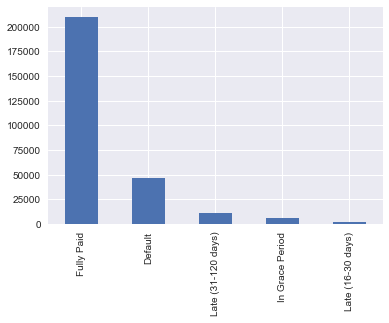

In [59]:
# displaying count plot for unique values in training dataset
final_df.loan_status.value_counts().plot.bar()

Obviously, dataset is still imbalanced despite dropping "Current" loans.

## Dealing with Imbalanced Dataset
In this section we apply the Synthetic Minority Over-Sampling Technique (SMOTE) to treat the imbalanced dataset.

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
# Testing out SMOTE
X = final_df.drop('loan_status', axis=1)
y = final_df.loan_status

sm = SMOTE(random_state=42)
for i in range(1,5):
    X_res, y_res = sm.fit_sample(X,y)
    X, y = X_res, y_res

//anaconda/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
//anaconda/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
//anaconda/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')
//anaconda/lib/python3.6/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


In [70]:
# grabbing list of column values from final dataframe
list(final_df)

['loan_status',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'term',
 'emp_length',
 'initial_list_status',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_ownership_NONE',
 'home_ownership_OTHER',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'verification_status_Not Verified',
 'verification_status_Source Verified',
 'verification_status_Verified',
 'purpose_car',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',

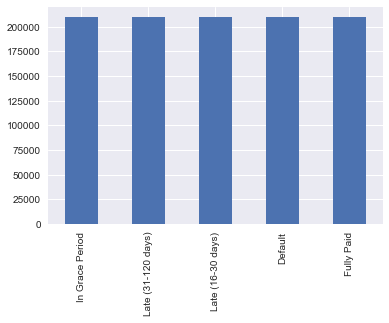

In [71]:
# fitting post SMOTE result into pandas dataframe
y_df = pd.DataFrame(y_res)

# appropriately renaming columns in target dataframe
y_df.columns = [list(final_df)[0]]

# we see now that we have a 50:50 ratio of defaults and non-defaults
y_df.loan_status.value_counts().plot.bar()

We see here that after applying SMOTE, the dataset is now balanced.

In [72]:
# fitting post SMOTE result into pandas dataframe
X_df = pd.DataFrame(X_res)

# appropriately renaming columns in target dataframe
X_df.columns = [list(final_df)[1::]]
X_df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT
0,5000.000000,5000.000000,4975.000000,10.650000,162.870000,1.077501e+06,27.650000,1.077501e+06,1.077501e+06,1.077501e+06,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.0
1,2500.000000,2500.000000,2500.000000,15.270000,59.830000,1.077430e+06,1.000000,1.077430e+06,1.077430e+06,1.077430e+06,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.0
2,2400.000000,2400.000000,2400.000000,15.960000,84.330000,1.077175e+06,8.720000,1.077175e+06,1.077175e+06,1.077175e+06,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,1.0,0.0
3,10000.000000,10000.000000,10000.000000,13.490000,339.310000,1.076863e+06,20.000000,1.076863e+06,1.076863e+06,1.076863e+06,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.0,0.0
4,5000.000000,5000.000000,5000.000000,7.900000,156.460000,1.075269e+06,11.200000,1.075269e+06,1.075269e+06,1.075269e+06,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.0,0.0
5,3000.000000,3000.000000,3000.000000,18.640000,109.430000,1.072053e+06,5.350000,1.072053e+06,1.072053e+06,1.072053e+06,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.0
6,5600.000000,5600.000000,5600.000000,21.280000,152.390000,1.071795e+06,5.550000,1.071795e+06,1.071795e+06,1.071795e+06,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,1.0,0.0
7,5375.000000,5375.000000,5350.000000,12.690000,121.450000,1.071570e+06,18.080000,1.071570e+06,1.071570e+06,1.071570e+06,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.0,0.0
8,6500.000000,6500.000000,6500.000000,14.650000,153.450000,1.070078e+06,16.120000,1.070078e+06,1.070078e+06,1.070078e+06,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.0
9,12000.000000,12000.000000,12000.000000,12.690000,402.540000,1.069908e+06,10.780000,1.069908e+06,1.069908e+06,1.069908e+06,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.0


- list of columns that have SMOTE values that are incorrectly in decimal places
- these columns are of the categorical values that were either numerically or one-hot encoded
- these columns should hence have values that are of integer form
- however, due to a limitation in the imbalanced-learn package, the SMOTE-NC package which is able to account for
- categorical values, has not yet been implemeneted in the latest version of the imbalanced-learn package
- the SMOTE algorithm would have generated synthetic observations for the minority class, but these observations
- due to the construction of the SMOTE algorithm (not SMOTE -NC) will produce decimals
- Therefore, a simple solution is applied to these columns where we simply round the generated value to the closest integer

- with the exception of the "term" feature, all other columns given that they are ordinal numbers, the rounding solution would be appropriate. a special function will be written for the "term" feature to round the numbers accordingly to the closest term (36 or 60)

In [73]:
# illustration of dataframe that consists of values that are not appropriately encoded after applying SMOTE
X_df[list(final_df)[30::]]

,term,emp_length,initial_list_status,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT
0,36.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.0
1,60.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.0
2,36.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,1.0,0.0
3,36.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.0,0.0
4,36.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.0,0.0
5,36.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.0
6,60.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,1.0,0.0
7,60.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.0,0.0
8,60.000000,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.0
9,36.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.0


In [78]:
# rounding all post-encoded categorical features excluding "term"
X_df[list(final_df)[31::]] = X_df[list(final_df)[31::]].round(0)

# we can see now from the 25 - 75 percentile that all decimal values have been rounded to the nearest integer
X_df[list(final_df)[31::]].describe().round()

,emp_length,initial_list_status,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT
count,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,...,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0
mean,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,9.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [75]:
# we can confirm that the SMOTE algorithm only produced synthetic observations within the range (36 < x < 60)
(X_df.term < 36).any()
(X_df.term > 60).any()

False

False

In [76]:
# the mid point of the range (36 < x < 60) is 48
# we round any number that is < 48 to 36, and any number that is >= 48 to 60
def term_round(x):
    if x < 48:
        x = 36
    elif x >= 48:
        x = 60
        
    return x

# illustrate non-integer values in "term" feature
X_df.term.value_counts()

# applying function to "term" feature
X_df.term = X_df.term.apply(term_round)

# display final result after applying function
X_df.term.value_counts()

36.000000    539180
60.000000    191733
55.124848         2
51.642900         2
53.455317         2
42.735767         2
44.298452         2
48.560491         2
51.187249         2
55.490720         2
50.641870         2
49.832706         2
58.176829         2
53.015237         2
44.479261         2
54.993112         2
53.719080         2
47.718513         2
44.404371         2
48.088595         2
45.873856         2
39.425067         2
39.919357         2
43.346301         2
49.580412         2
54.824886         2
50.054848         2
55.180774         2
50.083358         2
45.659972         2
              ...  
46.594566         1
53.401048         1
51.641433         1
56.014432         1
48.722786         1
49.221140         1
45.742228         1
39.505378         1
49.301888         1
43.987829         1
59.171833         1
57.958801         1
44.534357         1
43.820830         1
36.846010         1
42.744885         1
44.178706         1
44.432951         1
37.030851         1


36    698124
60    350431
Name: term, dtype: int64

In [127]:
# displaying the final feature dataframe
X_df.describe().round()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT
count,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,...,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0,1048555.0
mean,14789.0,14771.0,14714.0,15.0,448.0,24133261.0,19.0,24133261.0,24133261.0,24133261.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,7564.0,7557.0,7582.0,4.0,223.0,19827027.0,7.0,19827027.0,19827027.0,19827027.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,500.0,500.0,0.0,5.0,16.0,54734.0,0.0,54734.0,54734.0,54734.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,9169.0,9155.0,9086.0,13.0,289.0,6290018.0,13.0,6290018.0,6290018.0,6290018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,13606.0,13593.0,13535.0,15.0,407.0,18945054.0,19.0,18945054.0,18945054.0,18945054.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,19625.0,19595.0,19541.0,18.0,570.0,40923458.0,24.0,40923458.0,40923458.0,40923458.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,35000.0,35000.0,35000.0,29.0,1425.0,68604659.0,59.0,68604659.0,68604659.0,68604659.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Model Construction
The models that we will use to classify and predict from the data are the following:
<br>
<br>
<b>Linear Models:</b>
<br>
1) Logistic Regression
<br>
<br>
<b>Non-Linear Models:</b>
<br>
1) K-Nearest Neighbour (K-NN)
<br>
2) CART Decision Tree
<br>
3) Support Vector Machines

### Importing Modules and Preparing Dataset

In [79]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split

np.set_printoptions(suppress=True)

In [80]:
# splitting dataset into test and train samples
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.1, random_state=0)

# changing shape of y variable into a 1d array for sklearn package
y_train = np.ravel(y_train)

### Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegressionCV

In [85]:
# fitting Logistic Model to training data set
# k-fold Cross-validation: k = 10
# Regularization Penalty: l2-norm (Ridge)
lr_model = LogisticRegressionCV(cv=10, penalty='l2', multi_class='multinomial')
lr_model = lr_model.fit(X_train, y_train)

In [86]:
# showing the model accuracy score for the model on the training dataset
lr_model.score(X_train, y_train)

# showing the coefficients "picked" by the ridge penalty
pd.DataFrame(list(zip(X_train.columns, lr_model.coef_[0]))).round(6).sort_values(by=1)
# 0.60567193564897281 with multi_class='ovr'

0.60223545855193239

,0,1
14,out_prncp,-0.000276
15,out_prncp_inv,-0.000275
18,total_rec_prncp,-0.000171
17,total_pymnt_inv,-0.000130
16,total_pymnt,-0.000128
23,last_pymnt_amnt,-0.000088
19,total_rec_int,-0.000005
40,home_ownership_MORTGAGE,0.000000
41,home_ownership_NONE,0.000000
42,home_ownership_OTHER,0.000000


The logistic model does poorly, attaining a <b>60.22%</b> accuracy score. 

We can see here that the shrinkage function has "selected" the following variables. Ones that are at the top of this column that are inversely related to default, and ones at the bottom that are positively correlated to default. 

It has selected 15/64 of the features as ones that would in one way or another have an influence on the probability of default for a borrower. 

<b>Negative Coefficients:</b>
- 14	out_prncp	    -0.000276
- 15	out_prncp_inv	-0.000275
- 18	total_rec_prncp	-0.000171
- 17	total_pymnt_inv	-0.000130
- 16	total_pymnt	    -0.000128
- 23	last_pymnt_amnt	-0.000088
- 19	total_rec_int	-0.000005


<b> Positive Coefficients:</b>
- 29	term	                0.000001
- 11	revol_bal	            0.000002
- 22	collection_recovery_fee	0.000005
- 4	    installment	            0.000005
- 21	recoveries	            0.000048
- 2	    funded_amnt_inv	        0.000166
- 1	    funded_amnt	            0.000173
- 0	    loan_amnt	            0.000174

In [106]:
# Supervised Learning: Out of sample testing
lr_predicted = lr_model.predict(X_test)

# predictive accuracy score
metrics.accuracy_score(y_test, lr_predicted) 
# 0.60178721293965054 with 'ovr'

# classification report
print(metrics.classification_report(y_test, lr_predicted))

# confusion matrix
metrics.confusion_matrix(y_test, lr_predicted)

0.601424811169604

                    precision    recall  f1-score   support

           Default       0.99      0.97      0.98     20794
        Fully Paid       0.92      1.00      0.96     20989
   In Grace Period       0.34      0.69      0.46     21006
 Late (16-30 days)       0.34      0.04      0.07     20903
Late (31-120 days)       0.39      0.31      0.35     21164

       avg / total       0.60      0.60      0.56    104856



array([[20228,   162,   268,     8,   128],
       [   89, 20900,     0,     0,     0],
       [   33,   715, 14500,   809,  4949],
       [   19,   540, 14416,   827,  5101],
       [   35,   348, 13416,   757,  6608]])

The logistic model still performs poorly in the out of sample testing with a score of <b>60.14%</b>. 

In [88]:
# Unsupervised Learning: Testing on "Current" dataset to determine the probability that a current loan will default
# predicting the default for on-going loans
cur_lr_pred = lr_model.predict(cur_df)
cur_lr_pred
# visualising the number of defaults vs non-defaults for on-going loans
pd.Series(cur_lr_pred).value_counts()

# giving an estimate for the probability of default for on-going loans
cur_lr_prob = lr_model.predict_proba(cur_df)
cur_lr_prob

# descriptive statistics for the probability estimates
pd.DataFrame(cur_lr_prob).describe()

array(['In Grace Period', 'In Grace Period', 'In Grace Period', ...,
       'In Grace Period', 'In Grace Period', 'In Grace Period'], dtype=object)

In Grace Period       447110
Late (31-120 days)    128426
Late (16-30 days)      15958
Fully Paid             15791
Default                 2954
dtype: int64

array([[ 0.18566598,  0.18387522,  0.2174153 ,  0.20617267,  0.20687083],
       [ 0.12122962,  0.10706254,  0.26743354,  0.25792251,  0.24635179],
       [ 0.09160899,  0.07101282,  0.29248672,  0.28235862,  0.26253285],
       ..., 
       [ 0.00188186,  0.0000001 ,  0.34672162,  0.34252361,  0.30887281],
       [ 0.00223646,  0.0000003 ,  0.34843806,  0.34585496,  0.30347021],
       [ 0.00101692,  0.        ,  0.35056924,  0.33106861,  0.31734522]])

,0,1,2,3,4
count,6.102390e+05,6.102390e+05,6.102390e+05,6.102390e+05,6.102390e+05
mean,2.808435e-02,2.006511e-02,3.375254e-01,3.265766e-01,2.877485e-01
std,5.069018e-02,8.598480e-02,4.667112e-02,4.451305e-02,6.136401e-02
min,5.571133e-16,5.111888e-27,2.518190e-12,2.523062e-14,5.588099e-13
25%,2.127727e-04,5.104662e-11,3.236513e-01,3.173330e-01,2.525078e-01
50%,3.689538e-03,6.445299e-07,3.465347e-01,3.356889e-01,2.863552e-01
75%,3.165609e-02,6.559764e-04,3.652525e-01,3.520406e-01,3.276693e-01
max,6.814672e-01,1.000000e+00,6.002440e-01,3.793201e-01,5.746741e-01


We can see that the model gives the following probability estimates for the <i>nth</i> observation falling each respective class of default and non-default.

### K-Nearest Neighbours

We apply the following methodology for the construction of the K-Nearest Neighbours model.
<br>
1) Normalize data
<br> 
2) Apply PCA
<br>
3) Apply 10-fold Cross Validation to tune hyperparameters for K-NN Model
<br>
4) Test performance of optimized K-NN Model

In [89]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

0.43249091199056361

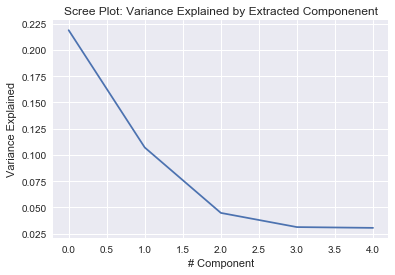

In [90]:
# scaling data before performing PCA
X_train_norm = preprocessing.scale(X_train)
X_test_norm = preprocessing.scale(X_test)

# performing PCA on scaled data
pca = PCA(n_components=5)
pca.fit(X_train_norm)

# Amount of variance collectively explained by all components
np.sum(pca.explained_variance_ratio_)

# Scree Plot
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.title('Scree Plot: Variance Explained by Extracted Componenent')
plt.xlabel('# Component')
plt.ylabel('Variance Explained')
plt.show()

The 5 principal components only manage to explain up to <b>43.25%</b> of the variance. We can also see in the scree plot that beyond 3 principal components, the subsequent components do not provide significant explanation for the variance in the dataset. We will however, for sake of simplicity stick to the 5 principal components in forming the dimension-reduced dataset. 

In [91]:
# extracting the principal components for use in the k-NN model

# Training Sample:
X_train_ext = pca.fit_transform(X_train_norm)
print(X_train_ext.shape)

# Test Sample:
X_test_ext = pca.fit_transform(X_test_norm)
print(X_test_ext.shape)

(943699, 5)
(104856, 5)


In [92]:
# Performing k-fold cross validation to pick the optimal hyperparameter - k 
cv_scores = []

for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_ext, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

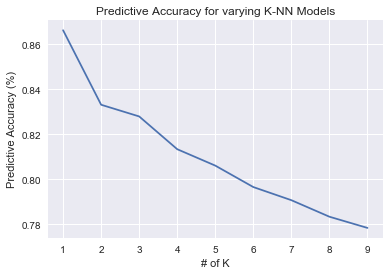

In [93]:
# plotting the varying predictive accuracy of all k-NN models
plt.plot(range(1,10), cv_scores)
plt.title('Predictive Accuracy for varying K-NN Models')
plt.xlabel('# of K')
plt.ylabel('Predictive Accuracy (%)')

We can see here from the plot that the optimal value for k is 1 as it provides the highest predictive power of <b>~86.5%</b>. 

In [94]:
# Constructing Optimal k-NN Model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_ext, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [107]:
# Testing performance of K-NN Model

# Out-of sample Testing
knn_predicted = knn.predict(X_test_ext)

# predictive accuracy score
metrics.accuracy_score(y_test, knn_predicted)

# classification report
print(metrics.classification_report(y_test, knn_predicted))

0.83772030212863358

                    precision    recall  f1-score   support

           Default       0.79      0.78      0.79     20794
        Fully Paid       0.91      0.85      0.88     20989
   In Grace Period       0.82      0.85      0.84     21006
 Late (16-30 days)       0.87      0.91      0.89     20903
Late (31-120 days)       0.80      0.80      0.80     21164

       avg / total       0.84      0.84      0.84    104856



A 5-NN model performs drastically better than the logistic regression model, scoring a <b>83.77%</b> predictive accuracy.

In [96]:
# Unsupervised Learning: Predicting defaults for on-going loans:

# scaling data before performing PCA
cur_df_norm = preprocessing.scale(cur_df)

# performing PCA on scaled data
pca = PCA(n_components=5)
pca.fit(cur_df_norm)
cur_df_ext = pca.fit_transform(cur_df_norm)

# predicting default or non-default for on-going loans
cur_knn_pred = knn.predict(cur_df_ext)
cur_knn_pred

# visualising the number of defaults vs non-defaults for on-going loans
pd.Series(cur_knn_pred).value_counts()

# giving an estimate for the probability of default for on-going loans
cur_knn_prob = knn.predict_proba(cur_df_ext)
cur_knn_prob

# descriptive statistics for the probability estimates
pd.DataFrame(cur_knn_prob).describe()

//anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

array(['In Grace Period', 'Late (31-120 days)', 'In Grace Period', ...,
       'Default', 'Late (31-120 days)', 'In Grace Period'], dtype=object)

Fully Paid            167906
Default               161321
Late (31-120 days)    120569
In Grace Period       105820
Late (16-30 days)      54623
dtype: int64

array([[ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.]])

,0,1,2,3,4
count,610239.000000,610239.000000,610239.000000,610239.000000,610239.000000
mean,0.264357,0.275148,0.173407,0.089511,0.197577
std,0.440991,0.446589,0.378599,0.285480,0.398171
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


### CART Decision Tree

In [97]:
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from os import system
from scipy import misc
import io

In [98]:
# WARNING: This section of code takes a long time to process (Est.: ~11hrs)
# running cross-validation to tune the hyperparameter, to determine the optimal depth that should be set for trees
# setting up Decisition Tree Classifier
dtree = tree.DecisionTreeClassifier()
# setting up parameter grid to search all the range of all predictors
param_grid = {'max_depth': range(1,64)}
# Performing Grid search for parameters using 10-fold Cross Validation
dtree = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=10)
dtree.fit(X_train, y_train)
# giving output for the optimal hyperparameter (max_depth)
dtree.best_params_

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 64)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

{'max_depth': 43}

In [101]:
# Testing the performance of Cross Validated Decision Tree
# Out of sample testing
dtree_preds = dtree.predict(X_test)
#dtree_performance = metrics.roc_auc_score(y_test, dtree_preds)

# Accuracy Score of model
metrics.accuracy_score(y_test, dtree_preds)

0.96038376440070194

The decision tree with optimized depth parameter scores well in the out-of-sample testing as expected, scoring a <b> 96.04%</b> predictive accuracy.

In [102]:
# Constructing AdaBoost to a Decision Tree Classifier set to optimal max depth of 43 nodes
bdt = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=43), algorithm="SAMME")
bdt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=43,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

Due to the nature of how decision trees are constructed, they typically tend to have high variance and low bias. This might be an issue for predictability because it may overfit the training data and hence not be generalised enough to predict items out of sample. 

In order to reduce the variance of our decision tree, we perform boosting, in particular, AdaBoost to generalise the decision tree further to improve predictive power. 

In [109]:
# Testing performance of AdaBoosted Decision Tree Model:
# Out-of sample Testing
bdt_pred = bdt.predict(X_test)

# overall predictive accuracy score
metrics.accuracy_score(y_test, bdt_pred)

# classification report
print(metrics.classification_report(y_test, bdt_pred))

0.96046005951018543

                    precision    recall  f1-score   support

           Default       0.99      0.99      0.99     20794
        Fully Paid       1.00      1.00      1.00     20989
   In Grace Period       0.93      0.94      0.94     21006
 Late (16-30 days)       0.94      0.95      0.95     20903
Late (31-120 days)       0.94      0.92      0.93     21164

       avg / total       0.96      0.96      0.96    104856



The AdaBoosted Decision Tree performs exceptionally well in the out-of-sample testing, scoring a <b>96.05%</b> preditive accuracy.

In [110]:
# Unsupervised Learning: Predicting defaults for on-going loans:
# predicting default or non-default for on-going loans
cur_bdt_pred = bdt.predict(cur_df)
cur_bdt_pred

# visualising the number of defaults vs non-defaults for on-going loans
pd.Series(cur_bdt_pred).value_counts()

# giving an estimate for the probability of default for on-going loans
cur_bdt_prob = bdt.predict_proba(cur_df)
cur_bdt_prob

# descriptive statistics for the probability estimates
pd.DataFrame(cur_bdt_prob).describe()

array(['In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)', ...,
       'In Grace Period', 'In Grace Period', 'Late (16-30 days)'], dtype=object)

In Grace Period       366778
Late (16-30 days)     122780
Late (31-120 days)    116020
Default                 4592
Fully Paid                69
dtype: int64

array([[ 0.18924966,  0.18924966,  0.24300137,  0.18924966,  0.18924966],
       [ 0.18924966,  0.18924966,  0.18924966,  0.24300137,  0.18924966],
       [ 0.18924966,  0.18924966,  0.18924966,  0.18924966,  0.24300137],
       ..., 
       [ 0.18924966,  0.18924966,  0.24300137,  0.18924966,  0.18924966],
       [ 0.18924966,  0.18924966,  0.24300137,  0.18924966,  0.18924966],
       [ 0.18924966,  0.18924966,  0.18924966,  0.24300137,  0.18924966]])

,0,1,2,3,4
count,610239.000000,610239.000000,610239.000000,610239.000000,610239.000000
mean,0.189654,0.189256,0.221557,0.200064,0.199469
std,0.004645,0.000572,0.026321,0.021549,0.021092
min,0.189250,0.189250,0.189250,0.189250,0.189250
25%,0.189250,0.189250,0.189250,0.189250,0.189250
50%,0.189250,0.189250,0.243001,0.189250,0.189250
75%,0.189250,0.189250,0.243001,0.189250,0.189250
max,0.243001,0.243001,0.243001,0.243001,0.243001


In [104]:
# Visualing Decision Tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

# Exporting visualised graphviz file
tree.export_graphviz(clf, out_file='clftree.dot', feature_names=X_train.columns, filled=True, rounded=True, rotate=True, class_names=True)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

<b><i>Visualised decision tree is too large to be displayed inline in Jupyter Notebook. Please refer to the appendix.</i></b>